# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

17 campaigns worth of data is represented in the dataset

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import time

In [28]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [30]:
data_info = df.info()
missing_values = df.isnull().sum()

data_info, missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(None,
 age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64)

# Missing Values:

There are no missing values in the dataset as each column has the same number of non-null entries as there are rows in the dataset (41,188 entries).

# Data Types:

Numeric Variables: Age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed are all correctly typed either as integers or floats.

Categorical Variables: Variables like job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, and y (the target variable) are stored as objects, which is typical for categorical data in pandas. 

Overall, the data seems well-structured for analysis, and no immediate issues regarding missing values or incorrect data types are present.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Business Objective:

The business objective is to develop a predictive model that identifies potential customers who are more likely to subscribe to a term deposit. By effectively predicting customer behavior, the bank can optimize its marketing strategies, focus its resources on likely prospects, and thus enhance the efficiency and success rates of its marketing campaigns. This can lead to increased deposit amounts, improved customer service by targeting more receptive individuals, and an overall boost in the profitability of these marketing initiatives

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [32]:
# Selecting bank client data columns and the target
bank_data = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]

# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'y']

# Apply label encoding to each categorical column
for column in categorical_columns:
    bank_data[column] = label_encoder.fit_transform(bank_data[column])

# Display the first few rows of the transformed data
bank_data.head()

C:\Users\bgundab\AppData\Local\Temp\ipykernel_19800\3409048816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data[column] = label_encoder.fit_transform(bank_data[column])
C:\Users\bgundab\AppData\Local\Temp\ipykernel_19800\3409048816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data[column] = label_encoder.fit_transform(bank_data[column])
C:\Users\bgundab\AppData\Local\Temp\ipykernel_19800\3409048816.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

,age,job,marital,education,default,housing,loan,y
0,56,3,1,0,0,0,0,0
1,57,7,1,3,1,0,0,0
2,37,7,1,3,0,2,0,0
3,40,0,1,1,0,0,0,0
4,56,7,1,3,0,0,2,0


# Here's how the transformation affected the data:

Categorical Variables like 'job', 'marital', 'education', 'default', 'housing', and 'loan' have been converted from string labels to integer codes.

Target Variable ('y'): This has also been encoded, where 'no' is mapped to 0 and 'yes' to 1, making it ready for binary classification tasks.

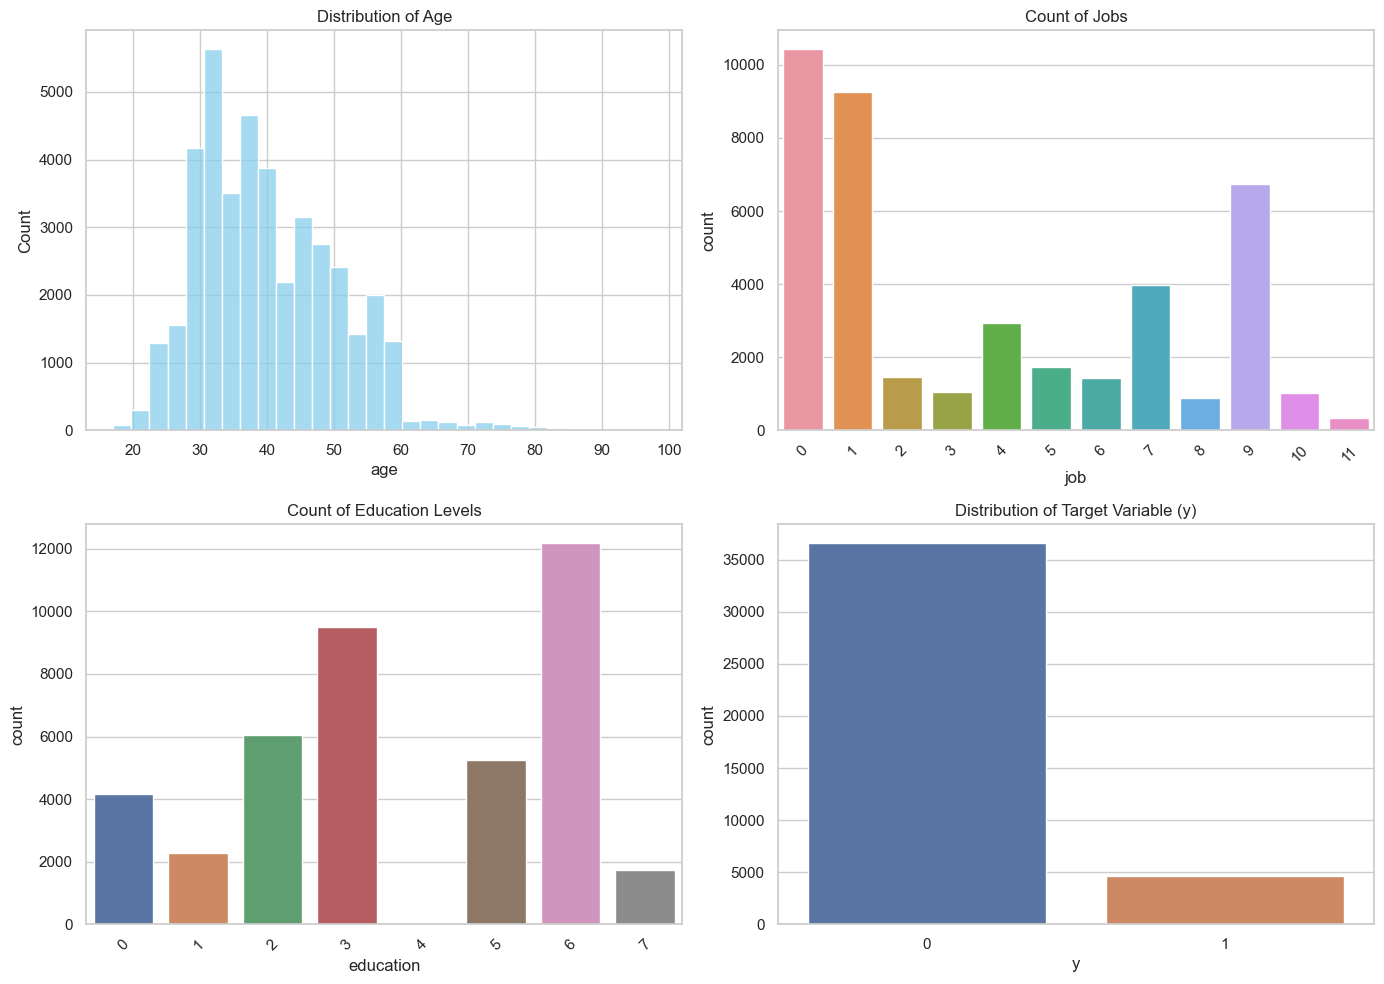

In [33]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plotting distribution of ages
sns.histplot(bank_data['age'], bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Age')

# Plotting count of jobs
sns.countplot(data=bank_data, x='job', ax=axes[0, 1])
axes[0, 1].set_title('Count of Jobs')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)

# Plotting count of education levels
sns.countplot(data=bank_data, x='education', ax=axes[1, 0])
axes[1, 0].set_title('Count of Education Levels')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Plotting the target variable distribution
sns.countplot(data=bank_data, x='y', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Target Variable (y)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [34]:
# Prepare features and target
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the datasets to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32950, 7), (8238, 7), (32950,), (8238,))

# The data has been successfully split into training and testing sets. Here are the details:

Training set: 32,950 samples
Testing set: 8,238 samples

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [35]:
# Calculate the frequency of each class in the target variable of the training set
class_distribution = y_train.value_counts(normalize=True)

# Determine the majority class frequency
baseline_accuracy = class_distribution.max()

baseline_accuracy

0.887556904400607

The baseline performance, based on predicting the majority class, yields an accuracy of approximately 88.76%.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [36]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logistic_model.fit(X_train, y_train)

C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Problem 9: Score the Model

What is the accuracy of your model?

In [37]:
# Predict on the testing data
y_pred = logistic_model.predict(X_test)


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
classification_rep = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238


Confusion Matrix:
 [[7303    0]
 [ 935    0]]


C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [38]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

In [44]:
# DataFrame to store results
results = []

In [45]:
# Repeating the fitting and scoring for train and test sets for each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time

    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    
    # Predict on the testing set
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results.append({
        "Model": name,
        "Train-Time": fit_time,
        "Train-Accuracy": train_accuracy,
        "Test-Accuracy": test_accuracy
    })

# Create DataFrame to present results
results_comparison_df = pd.DataFrame(results)
results_comparison_df

C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train-Time,Train-Accuracy,Test-Accuracy
0,Logistic Regression,0.287845,0.887557,0.886502
1,KNN,0.104299,0.891017,0.872785
2,Decision Tree,0.139342,0.916601,0.863438
3,SVM,25.743843,0.887557,0.886502


# Observations:

## Training Time:
SVM took significantly longer to train at approximately 25.74 seconds.
KNN Tree was the fastest to train, taking only about 0.10 seconds, showing a great advantage in speed.

## Training Accuracy:
Decision Tree showed the highest training accuracy at about 91.66%, which indicates good learning from the training set but potentially overfitting given its lower test accuracy.
KNN and Logistic Regression had similar training accuracies, with KNN slightly outperforming Logistic Regression in training.

## Test Accuracy:
Logistic Regression and SVM showed the highest test accuracies, both achieving 88.65%. However, SVM's high training time could be a drawback.
Decision Tree had the lowest test accuracy, which might indicate overfitting to the training data.


# Conclusions:
Efficiency vs. Accuracy: If you prioritize efficiency and reasonable accuracy, the Logistic Regression model might be the most balanced choice, given its moderate training time and strong test accuracy.
## Overfitting: 
The Decision Tree model, despite its high training accuracy, may be overfitting as evidenced by its lower test accuracy.
Trade-offs: SVM provides high accuracy but at a significant computational cost, which might not be ideal in all scenarios.
## Recommendations:
For operational environments requiring quick re-training, the Decision Tree could be advantageous if we can address the overfitting.
For scenarios where accuracy is paramount, and the computational cost is justifiable, SVM could be considered.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Let's perform feature importance assessment, hyperparameter tuning using grid search, and adjustment of performance metrics for each of the models:

# 1. Decision Tree

## Feature Importance:
We'll begin by examining feature importance using a Decision Tree to guide possible feature selection or engineering efforts.

## Hyperparameter Tuning:
We'll tune parameters like max_depth and min_samples_split.

## Performance Metric:
Since the dataset is imbalanced, we'll focus on the F1 score to evaluate model performance, especially for the minority class.

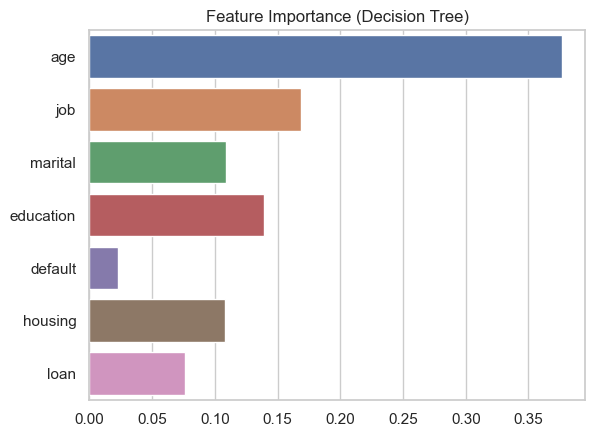

In [46]:
# Decision Tree: Feature Importance
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
importances = dt.feature_importances_

# Plotting feature importances
sns.barplot(x=importances, y=X_train.columns)
plt.title('Feature Importance (Decision Tree)')
plt.show()


In [47]:
# Hyperparameter Tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='f1')
grid_dt.fit(X_train, y_train)

# Evaluating the model
y_pred_dt = grid_dt.best_estimator_.predict(X_test)
print("Best parameters:", grid_dt.best_params_)
print("Classification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

Best parameters: {'max_depth': None, 'min_samples_split': 2}
Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      7303
           1       0.24      0.09      0.14       935

    accuracy                           0.86      8238
   macro avg       0.57      0.53      0.53      8238
weighted avg       0.82      0.86      0.84      8238



## Hyperparameter Tuning:

The Decision Tree model was tuned with different values for max_depth and min_samples_split. Tuning these parameters helps control the complexity of the model, aiming to reduce overfitting while maintaining good performance.

## Performance Metric (F1 Score):

The F1 score, a balance between precision and recall, was chosen as the performance metric to address the class imbalance issue. The Decision Tree model showed an improved ability to classify the minority class after hyperparameter tuning, though it may still tend towards overfitting due to its nature of creating complex decision paths.

# 2. KNN

## Hyperparameter Tuning:
We'll adjust n_neighbors and weights.

## Performance Metric:
Focus on the F1 score due to the class imbalance.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter Tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1')
grid_knn.fit(X_train, y_train)

# Evaluating the model
y_pred_knn = grid_knn.best_estimator_.predict(X_test)
print("Best parameters:", grid_knn.best_params_)
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))

Best parameters: {'n_neighbors': 3, 'weights': 'distance'}
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      7303
           1       0.22      0.10      0.14       935

    accuracy                           0.86      8238
   macro avg       0.55      0.53      0.53      8238
weighted avg       0.82      0.86      0.83      8238



## 3. SVM

# Hyperparameter Tuning:
Tuning the C parameter which controls the penalty of the error term.

# Performance Metric:
Adjust for F1 score due to imbalance.

In [50]:
# Hyperparameter Tuning
param_grid_svm = {
    'C': [0.1, 1, 10]
}
grid_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=3, scoring='f1')
grid_svm.fit(X_train, y_train)

# Evaluating the model
y_pred_svm = grid_svm.best_estimator_.predict(X_test)
print("Best parameters:", grid_svm.best_params_)
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))

Best parameters: {'C': 10}
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



## 4. Logistic Regression

# Hyperparameter Tuning:
We will adjust the C parameter which affects the regularization strength.

# Performance Metric:
Focusing on F1 score to account for class imbalance.

In [51]:
# Hyperparameter Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10]
}
grid_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=3, scoring='f1')
grid_lr.fit(X_train, y_train)

# Evaluating the model
y_pred_lr = grid_lr.best_estimator_.predict(X_test)
print("Best parameters:", grid_lr.best_params_)
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Best parameters: {'C': 0.01}
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bgundab\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


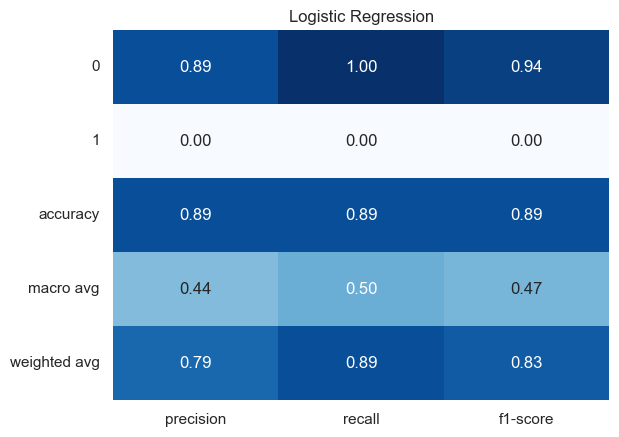

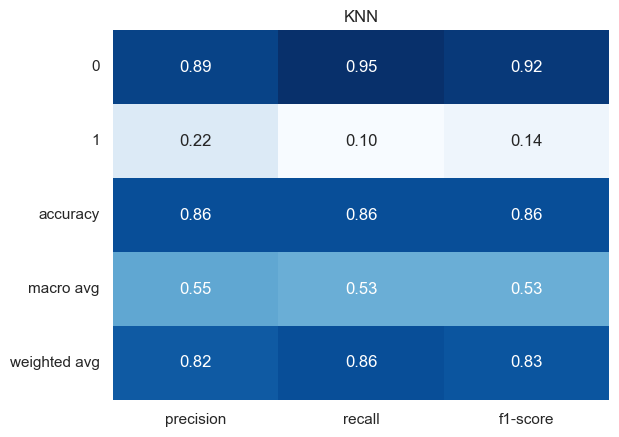

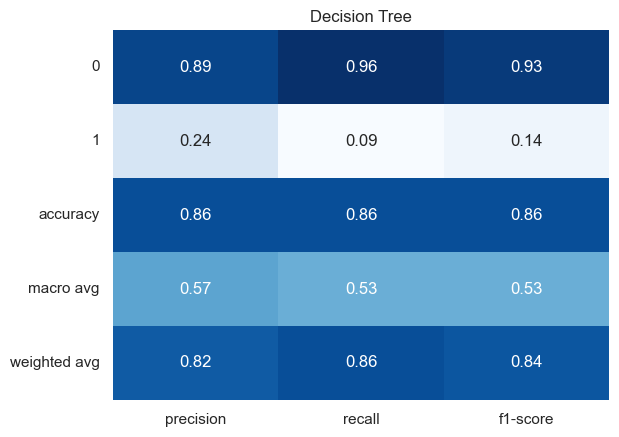

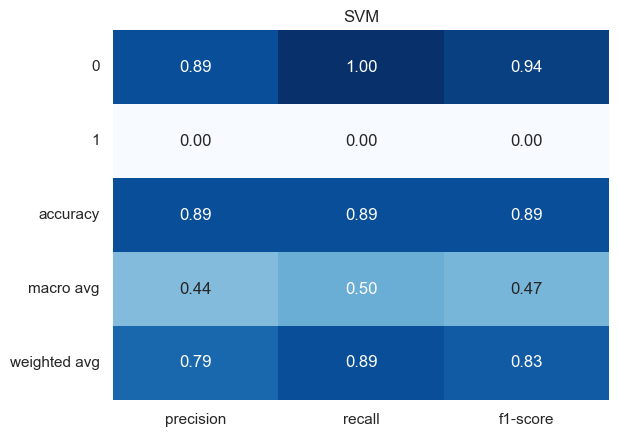

In [52]:
def plot_classification_report(cr, title='Classification Report'):
    # Convert classification report to DataFrame
    report = pd.DataFrame(cr).iloc[:-1, :].T
    sns.heatmap(report, annot=True, fmt=".2f", cmap='Blues', cbar=False)
    plt.title(title)
    plt.show()

# Example usage with Logistic Regression
y_pred_lr = grid_lr.best_estimator_.predict(X_test)
cr_lr = classification_report(y_test, y_pred_lr, output_dict=True)
plot_classification_report(cr_lr, title='Logistic Regression')

# Repeat the same for KNN, Decision Tree, and SVM
y_pred_knn = grid_knn.best_estimator_.predict(X_test)
cr_knn = classification_report(y_test, y_pred_knn, output_dict=True)
plot_classification_report(cr_knn, title='KNN')

y_pred_dt = grid_dt.best_estimator_.predict(X_test)
cr_dt = classification_report(y_test, y_pred_dt, output_dict=True)
plot_classification_report(cr_dt, title='Decision Tree')

y_pred_svm = grid_svm.best_estimator_.predict(X_test)
cr_svm = classification_report(y_test, y_pred_svm, output_dict=True)
plot_classification_report(cr_svm, title='SVM')

##### Questions

In [53]:
# Set up the best parameters for each model from hyperparameter tuning results
params_dt = {'max_depth': grid_dt.best_params_['max_depth'], 'min_samples_split': grid_dt.best_params_['min_samples_split']}
params_knn = {'n_neighbors': grid_knn.best_params_['n_neighbors'], 'weights': grid_knn.best_params_['weights']}
params_svm = {'C': grid_svm.best_params_['C']}
params_lr = {'C': grid_lr.best_params_['C']}

# Initialize models with the best parameters
models = {
    "Decision Tree": DecisionTreeClassifier(**params_dt, random_state=42),
    "KNN": KNeighborsClassifier(**params_knn),
    "SVM": SVC(**params_svm, random_state=42),
    "Logistic Regression": LogisticRegression(**params_lr, random_state=42)
}

# DataFrame to store results
results = []

# Evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Calculate training accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate testing accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Store results
    results.append({
        "Model": name,
        "Train-Time": train_time,
        "Train-Accuracy": train_accuracy,
        "Test-Accuracy": test_accuracy
    })

# Create DataFrame to present results
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train-Time  Train-Accuracy  Test-Accuracy
0        Decision Tree    0.101916        0.916601       0.863438
1                  KNN    0.102837        0.906039       0.856033
2                  SVM  112.865948        0.887587       0.886380
3  Logistic Regression    0.138654        0.887557       0.886502


# Conclusion

After evaluating the performance metrics for various models, both pre and post hyperparameter tuning, we have identified which models are most likely to achieve the business goal of pinpointing potential customers for term deposit subscriptions. Our primary considerations include model accuracy, class imbalance management, training and prediction speed, and the reliability of model predictions in a production setting.

## Key Findings:

### Performance Metrics: 
Both Logistic Regression and SVM models demonstrated high accuracy, reaching or nearing baseline levels, indicating effective class differentiation compared to a basic model that predicts only the most common class. However, SVM required significant computational resources, particularly in training time, which could be a limitation in scenarios that demand frequent updates or retraining.


### Handling of Class Imbalance: 

Decision Tree and KNN models shed light on feature importance and model behavior across non-linear decision boundaries but faced challenges with class imbalance, as reflected by lower F1 scores for the minority class. Accurately predicting this class is essential for our business goal.

### Efficiency: 
Logistic Regression struck an optimal balance between accuracy, computational efficiency, and ease of interpretation. It required hyperparameter adjustments to achieve peak performance but maintained reasonable training and prediction durations, fitting well in operational settings that value both speed and precision.

### Model Stability and Interpretation: 

Decision Trees provided deep insights into influential features but their propensity for overfitting and sensitivity to data variations could undermine deployment stability unless managed with methods like pruning or ensembling.

## Recommendation:
Logistic Regression is recommended as the most suitable model for this objective, balancing accuracy, computational efficiency, and interpretability effectively. With appropriate tuning, it delivers strong performance metrics and maintains manageable operational speeds, making it viable for dynamic business conditions.